In [99]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [4]:
df = pd.read_csv('AirQualityUCI.csv', sep=';')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [17]:
df.set_index(pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S'), inplace=True)
# df.info()

In [29]:
df.dropna(subset='Date', inplace=True)

In [60]:
df = df.groupby(df.index.date)[['PT08.S1(CO)']].mean()

<Axes: >

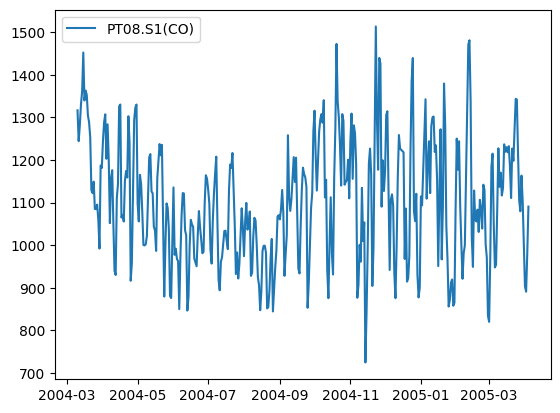

In [61]:
df.plot(kind='line', y='PT08.S1(CO)')

In [121]:
from statsmodels.tsa.stattools import adfuller

In [122]:
adfuller(df)

(-9.810878207124084,
 5.661521804438842e-17,
 1,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 4413.457196832311)

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

In [83]:
df.set_index(pd.to_datetime(df.index), inplace=True)

In [85]:
df.index

DatetimeIndex(['2004-03-10', '2004-03-11', '2004-03-12', '2004-03-13',
               '2004-03-14', '2004-03-15', '2004-03-16', '2004-03-17',
               '2004-03-18', '2004-03-19',
               ...
               '2005-03-26', '2005-03-27', '2005-03-28', '2005-03-29',
               '2005-03-30', '2005-03-31', '2005-04-01', '2005-04-02',
               '2005-04-03', '2005-04-04'],
              dtype='datetime64[ns]', length=383, freq=None)

In [79]:
yHist = df[:300]
yFuture = df[300:]

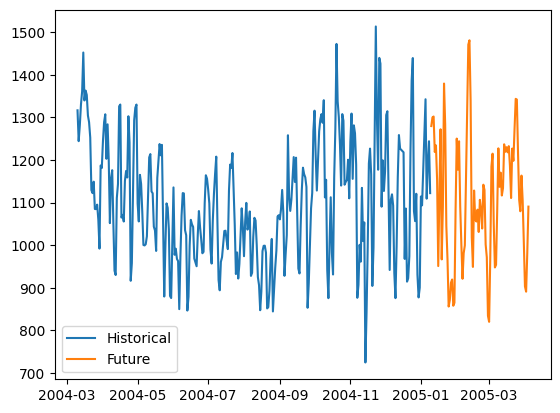

In [80]:
plt.plot(yHist, label='Historical')
plt.plot(yFuture, label='Future')
plt.legend()

In [81]:
yHist

,PT08.S1(CO)
2004-03-10,1316.500000
2004-03-11,1244.166667
2004-03-12,1281.666667
2004-03-13,1330.666667
2004-03-14,1361.125000
...,...
2005-01-05,1342.478261
2005-01-06,1109.208333
2005-01-07,1192.333333
2005-01-08,1243.958333


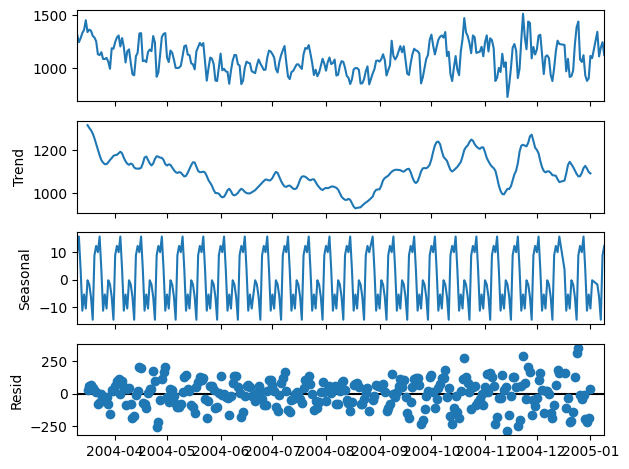

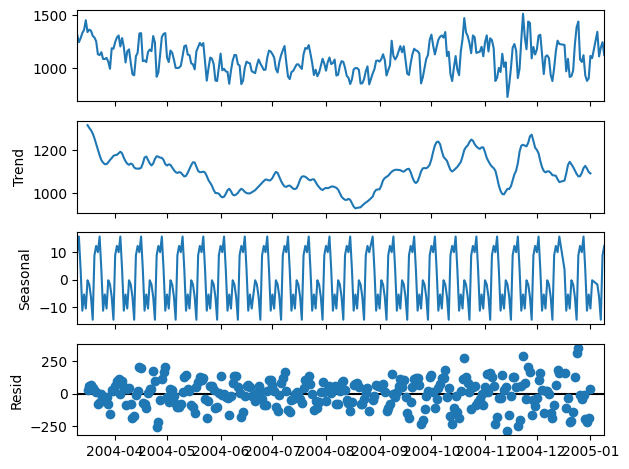

In [120]:
decomp = sm.tsa.seasonal_decompose(yHist, model='additive', period=12)
decomp.plot()

In [96]:
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [97]:
stl = STL(yHist, period=12)
results = stl.fit()

In [98]:
results.trend

2004-03-10    1439.014703
2004-03-11    1420.175516
2004-03-12    1401.019220
2004-03-13    1381.589429
2004-03-14    1361.968434
                 ...     
2005-01-05    1106.766372
2005-01-06    1107.523345
2005-01-07    1108.398359
2005-01-08    1109.312667
2005-01-09    1110.227044
Name: trend, Length: 300, dtype: float64

In [114]:
stlForecast = STLForecast(yHist, ARIMA, model_kwargs={'order':(1,1,0), 'trend':'t'}, period=12)
forecastResults = stlForecast.fit()
forecast = forecastResults.forecast(len(yFuture))

c:\Users\ryans\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ryans\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ryans\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [115]:
yFuture

,PT08.S1(CO)
2005-01-10,1279.583333
2005-01-11,1300.000000
2005-01-12,1301.958333
2005-01-13,1218.791667
2005-01-14,1234.250000
...,...
2005-03-31,1008.125000
2005-04-01,903.291667
2005-04-02,890.958333
2005-04-03,981.375000


In [116]:
forecast = pd.DataFrame(forecast).set_index(yFuture.index)

In [117]:
forecast

,0
2005-01-10,1182.496186
2005-01-11,1241.255937
2005-01-12,1105.250632
2005-01-13,936.003090
2005-01-14,936.521839
...,...
2005-03-31,972.511525
2005-04-01,1165.924598
2005-04-02,1090.090509
2005-04-03,1192.114810


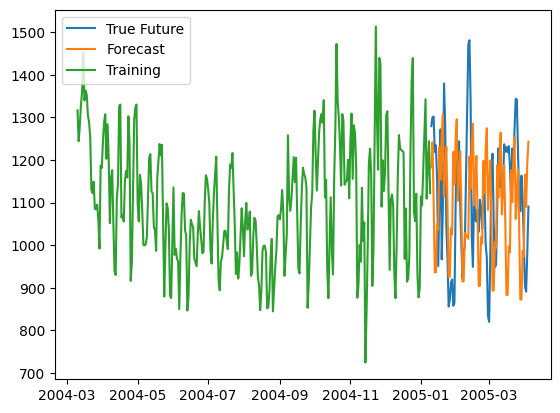

In [118]:
plt.plot(yFuture, label='True Future')
plt.plot(forecast, label='Forecast')
plt.plot(yHist, label='Training')
plt.legend()

In [146]:
yFuture['PT08.S1(CO)'].shape

(83,)

In [150]:
forecast.loc[:,0]

2005-01-10    1182.496186
2005-01-11    1241.255937
2005-01-12    1105.250632
2005-01-13     936.003090
2005-01-14     936.521839
                 ...     
2005-03-31     972.511525
2005-04-01    1165.924598
2005-04-02    1090.090509
2005-04-03    1192.114810
2005-04-04    1242.652624
Name: 0, Length: 83, dtype: float64

In [151]:
error = yFuture['PT08.S1(CO)'] - forecast.loc[:,0]

In [125]:
import numpy as np

In [152]:
mae = np.abs(error).mean()
mae

151.59673065304452

In [154]:
rmse = np.sqrt((error**2).mean())
rmse

183.73424737979028